# Лабораторная №1

## 1) Текстовое описание набора даных

В качестве набора данных мы будем использовать набор данных по отсутсвии на работе - 
https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work

Набор данных состоит из одного файла: 
 - Absenteeism_at_work.csv

Файл содерит колонки:

 - Individual identification (ID) - идентификатор.
 - Reason for absence (ICD) - причина отсутсвия (28 категорий указаны в файле Attribute Information.docx).
 - Month of absence - месяц отсутствия.
 - Day of the week - день недели (понедельник (2), вторник (3), среда (4), четверг (5), пятница (6)).
 - Seasons - сезон.
 - Transportation expense - транспорные расходы.
 - Distance from Residence to Work - расстояния до места работы (км).
 - Service time - стаж.
 - Age - возраст.
 - Work load Average/day - занятость.
 - Hit target
 - Disciplinary failure - дисциплинарное взыскание ( да - 1, нет - 0).
 - Education - образование (средняя школа (1), выпускник (2), аспирант (3), магистр и доктор (4)).
 - Son - количество детей.
 - Social drinker - малопьющий (да - 1, нет - 0).
 - Social smoker - малокурящий (да - 1, нет - 0).
 - Pet - домашнее животное (количество животных).
 - Weight - вес.
 - Height - высота.
 - Body mass index - индекс массы тела.
 - Absenteeism time in hours - время прогулов (целевой признак). 

# Импорт библиотек
Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первой ячейке ноутбука, но мы в этом примере будем подключать все библиотеки последовательно, по мере их использования.


In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка данных
Загрузим файлы датасета в помощью библиотеки Pandas. 

In [85]:
data = pd.read_csv('data/absenteeism_at_work.csv', sep=";")

# 2) Основные характеристики датасета

In [86]:
# Первые 5 строк датасета
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [87]:
# Размер датасета - 740 строк, 21 колонка
data.shape

(740, 21)

In [88]:
# Список колонок
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [89]:
# Список колонок с типами данных
data.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [90]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

ID - 0
Reason for absence - 0
Month of absence - 0
Day of the week - 0
Seasons - 0
Transportation expense - 0
Distance from Residence to Work - 0
Service time - 0
Age - 0
Work load Average/day  - 0
Hit target - 0
Disciplinary failure - 0
Education - 0
Son - 0
Social drinker - 0
Social smoker - 0
Pet - 0
Weight - 0
Height - 0
Body mass index - 0
Absenteeism time in hours - 0


In [91]:
# Основные статистические характеристки набора данных
data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


Характеристики:

1. __Count__ Количество непустых значений.

2. __Mean__ Медиана.

3. __Std__ Стандартное отклонение.

4. __Min__ Минимальное значение.

5. __25%, 50%, and 75%__ Квантили уровня.

6. __Max__ Максимальное значение.

In [92]:
# Определим уникальные значения для целевого признака
data['Absenteeism time in hours'].unique()

array([  4,   0,   2,   8,  40,   1,   7,   3,  32,   5,  16,  24,  64,
        56,  80, 120, 112, 104,  48], dtype=int64)

Целевой признак является целым числом от 0 до 120 (в данном случае)

# 3) Визуальное исследование датасета


### Диаграмма рассеяния для признаков Absenteeism time in hours и Work load Average/day

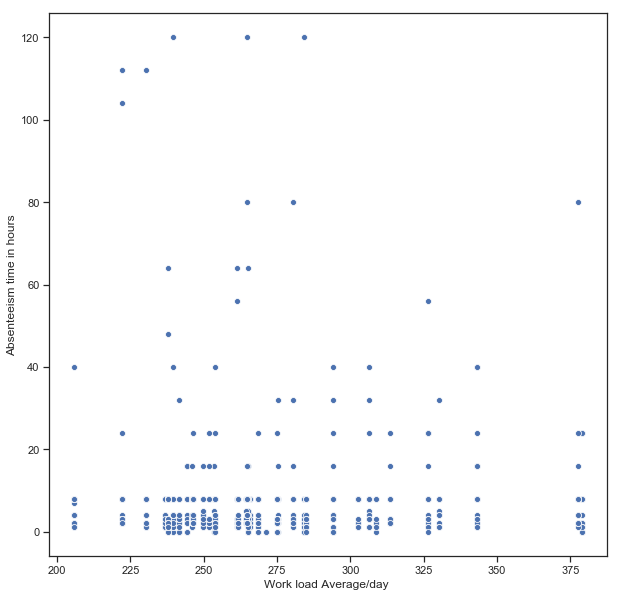

In [93]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Work load Average/day ', y='Absenteeism time in hours', data=data)

Посмотрим влияние расстояния от дома до работы (Distance from Residence to Work).

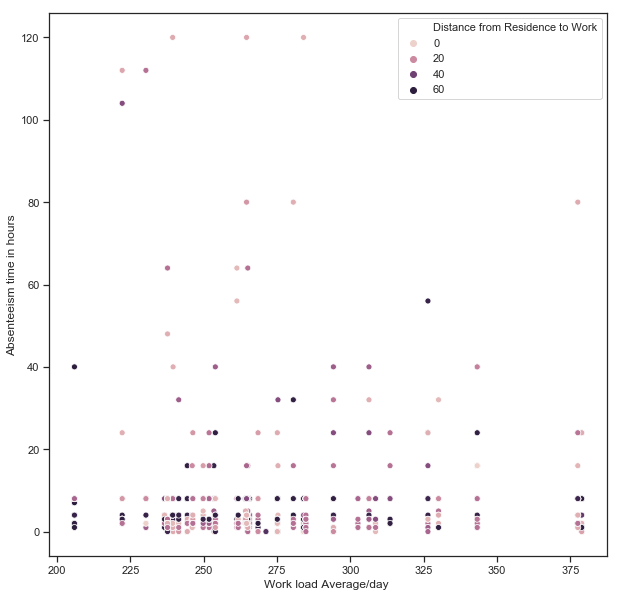

In [94]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Work load Average/day ', y='Absenteeism time in hours', data=data, hue='Distance from Residence to Work')

По этим диаграммам не обнаруживается зависимость, ни от занятости ни от длительности поездки для времени прогулов.

Проверим зависимость между расстоянием до работы и стоимостью проезда:

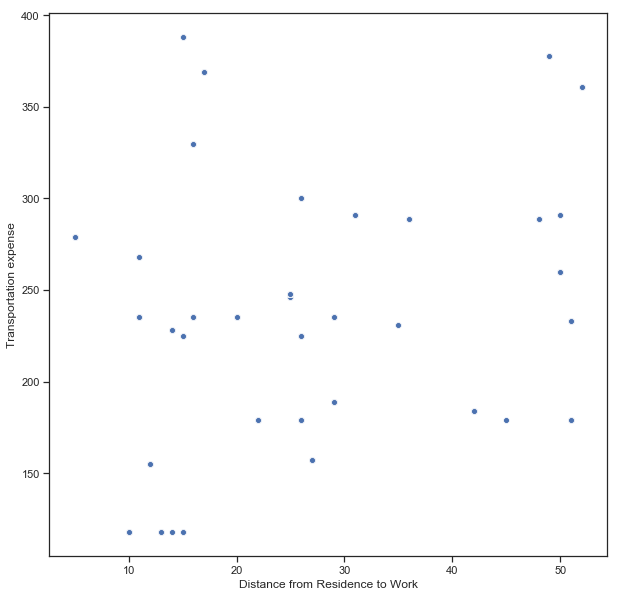

In [95]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Distance from Residence to Work', y='Transportation expense', data=data)

В данном случае транспортные расходы не зависят от расстояния до работы.


## Круговая диаграмма (Вредные привычки)

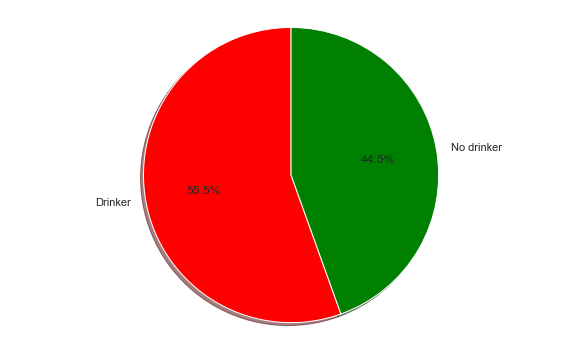

In [96]:
drinker =len(data[data['Social drinker'] == 1] - data[data['Absenteeism time in hours'] == 0])
no_drinker = len(data[data['Social drinker']== 0] - data[data['Absenteeism time in hours'] == 0])

plt.figure(figsize=(10,6))

# Data to plot
labels = 'Drinker','No drinker'
sizes = [drinker, no_drinker]
colors = ['red', 'green']
explode = (0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

## Гистограмма
Позволяет оценить плотность вероятности распределения данных.

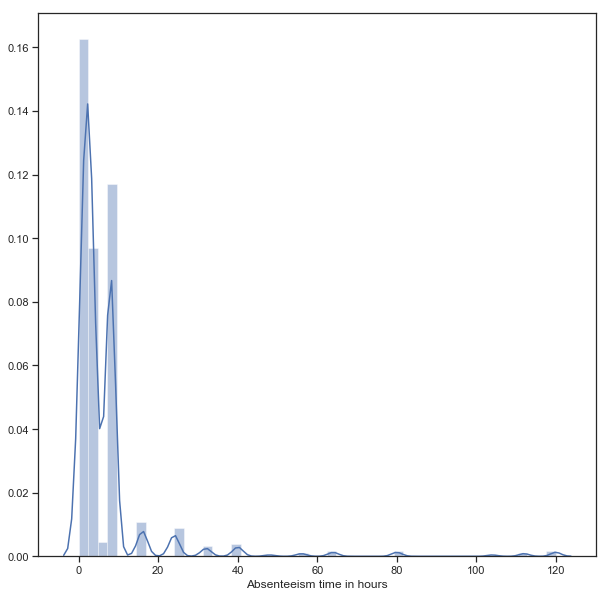

In [97]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Absenteeism time in hours'])

### "Парные диаграммы"
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

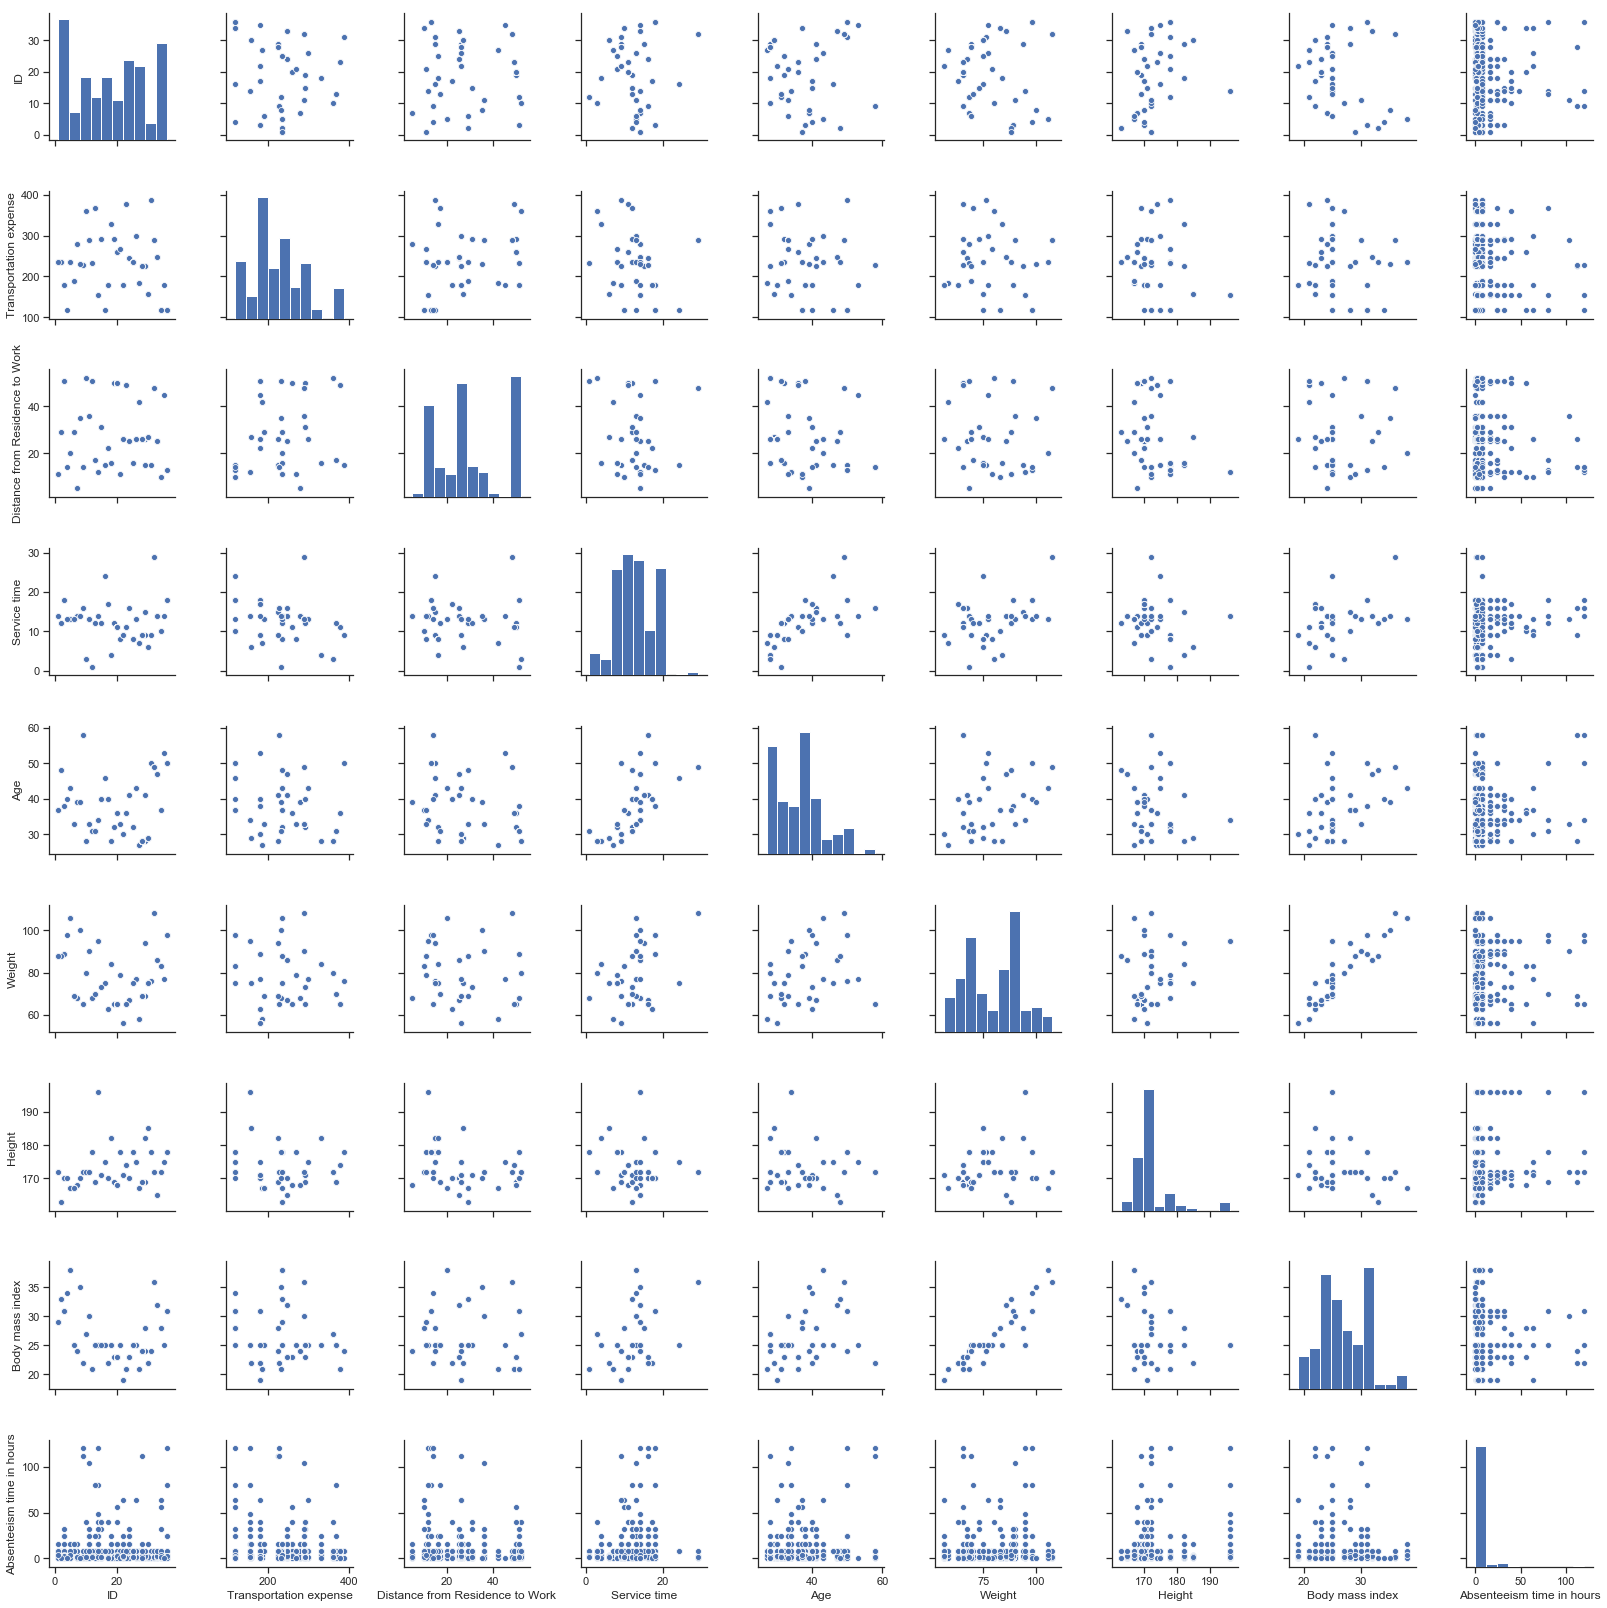

In [104]:
data_pairplot = data.copy()
del data_pairplot['Day of the week'], data_pairplot['Disciplinary failure']
del data_pairplot['Seasons'], data_pairplot['Education'], data_pairplot['Month of absence']
del data_pairplot['Son'], data_pairplot['Social drinker']
del data_pairplot['Social smoker'], data_pairplot['Pet'], data_pairplot['Reason for absence']
del data_pairplot['Hit target'], data_pairplot['Work load Average/day ']
sns.pairplot(data_pairplot)

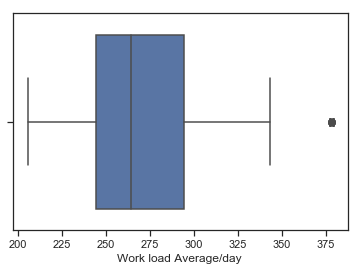

In [109]:
sns.boxplot(x=data['Work load Average/day '])

# 4) Корреляция признаков

In [114]:
data.corr()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,1.000000,-0.064245,-0.000043,0.034468,0.098495,-0.224163,-0.486160,-0.272704,0.040899,0.092457,...,0.004502,-0.036254,0.002767,-0.451338,-0.010826,-0.041418,-0.254222,0.076363,-0.306924,-0.017997
Reason for absence,-0.064245,1.000000,-0.083858,0.116319,-0.117925,-0.119381,0.161831,0.048425,-0.078608,-0.123472,...,-0.545054,-0.047357,-0.055364,0.065441,-0.115702,-0.055911,-0.000269,-0.079267,0.037205,-0.173116
Month of absence,-0.000043,-0.083858,1.000000,-0.006528,0.407770,0.137525,-0.003887,-0.062862,-0.001520,-0.169989,...,0.107946,-0.066128,0.079031,0.056226,-0.038603,0.047787,0.023278,-0.068942,0.051046,0.024345
Day of the week,0.034468,0.116319,-0.006528,1.000000,0.046493,0.033988,0.118026,0.021252,0.004459,0.015646,...,-0.015120,0.058516,0.098079,0.041772,0.013156,-0.028885,-0.128980,-0.082133,-0.103578,-0.124361
Seasons,0.098495,-0.117925,0.407770,0.046493,1.000000,0.036995,-0.063108,-0.010904,-0.012089,0.150439,...,0.151766,-0.002951,0.046950,-0.045982,-0.048671,0.012356,-0.026278,-0.033737,-0.011031,-0.005615
Transportation expense,-0.224163,-0.119381,0.137525,0.033988,0.036995,1.000000,0.262183,-0.349887,-0.227542,0.005438,...,0.109222,-0.055065,0.383001,0.145117,0.044356,0.400080,-0.207435,-0.194496,-0.136517,0.027585
Distance from Residence to Work,-0.486160,0.161831,-0.003887,0.118026,-0.063108,0.262183,1.000000,0.131730,-0.145886,-0.068677,...,-0.056527,-0.259605,0.054230,0.452196,-0.075369,0.205941,-0.047859,-0.353372,0.113772,-0.088363
Service time,-0.272704,0.048425,-0.062862,0.021252,-0.010904,-0.349887,0.131730,1.000000,0.670979,-0.000668,...,-0.000221,-0.213000,-0.047128,0.353141,0.072424,-0.440301,0.455975,-0.053135,0.499718,0.019029
Age,0.040899,-0.078608,-0.001520,0.004459,-0.012089,-0.227542,-0.145886,0.670979,1.000000,-0.039425,...,0.104304,-0.221882,0.056984,0.213183,0.121738,-0.231226,0.418730,-0.062997,0.470688,0.065760
Work load Average/day,0.092457,-0.123472,-0.169989,0.015646,0.150439,0.005438,-0.068677,-0.000668,-0.039425,1.000000,...,0.029026,-0.074960,0.027820,-0.033713,0.030968,0.007114,-0.038522,0.103315,-0.090709,0.024749


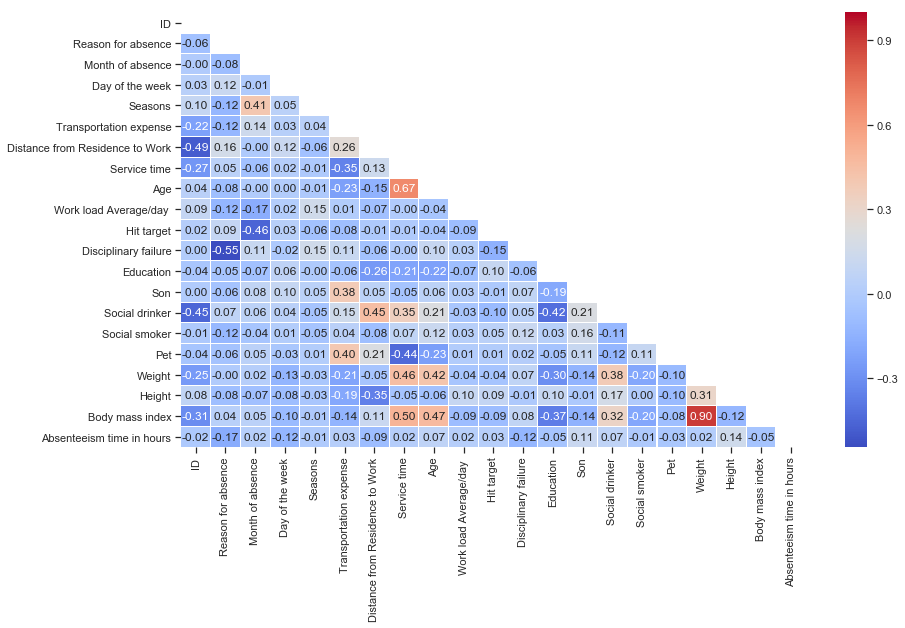

In [121]:
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), mask=mask,annot = True, cmap='coolwarm',linewidths=.1, fmt='.2f')
plt.show()

# 5) Выводы


 - Количество часов, когда человек не бывает на работе не коррелирует ни с одним из признаков. 
 - Слабую корреляция есть у причины отсутствия и дисциплинарным взысканием.